In [ ]:
#Download train images
!wget https://s3.amazonaws.com/cvmlp/vqa/abstract_v002/scene_img/scene_img_abstract_v002_train2015.zip

--2024-05-21 04:39:14--  https://s3.amazonaws.com/cvmlp/vqa/abstract_v002/scene_img/scene_img_abstract_v002_train2015.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 16.182.106.32, 52.216.42.80, 52.216.61.32, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|16.182.106.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2906984514 (2.7G) [application/zip]
Saving to: ‘scene_img_abstract_v002_train2015.zip’

scene_img_abstract_ 100%[===================>]   2.71G  41.2MB/s    in 71s     

2024-05-21 04:40:25 (39.3 MB/s) - ‘scene_img_abstract_v002_train2015.zip’ saved [2906984514/2906984514]



In [ ]:
#Download val images
!wget https://s3.amazonaws.com/cvmlp/vqa/abstract_v002/scene_img/scene_img_abstract_v002_val2015.zip

--2024-05-21 04:40:27--  https://s3.amazonaws.com/cvmlp/vqa/abstract_v002/scene_img/scene_img_abstract_v002_val2015.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.164.32, 52.216.52.200, 52.216.246.38, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.164.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1453539826 (1.4G) [application/zip]
Saving to: ‘scene_img_abstract_v002_val2015.zip’

scene_img_abstract_ 100%[===================>]   1.35G  37.0MB/s    in 39s     

2024-05-21 04:41:06 (36.0 MB/s) - ‘scene_img_abstract_v002_val2015.zip’ saved [1453539826/1453539826]



In [ ]:
!mkdir train
!mkdir val
!mkdir "/content/train/class1"
!mkdir "/content/val/class1"

In [ ]:
!unzip /content/scene_img_abstract_v002_train2015.zip -d "/content/train/class1"

Archive:  /content/scene_img_abstract_v002_train2015.zip
replace /content/train/class1/abstract_v002_train2015_000000000000.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/train/class1/abstract_v002_train2015_000000000001.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip /content/scene_img_abstract_v002_val2015.zip -d "/content/val/class1"

In [ ]:
#Download the questions and annotations
!wget https://s3.amazonaws.com/cvmlp/vqa/abstract_v002/vqa/Questions_Train_abstract_v002.zip #train questions
!wget https://s3.amazonaws.com/cvmlp/vqa/abstract_v002/vqa/Questions_Val_abstract_v002.zip #val questions
!wget https://s3.amazonaws.com/cvmlp/vqa/abstract_v002/vqa/Annotations_Train_abstract_v002.zip #train annotations
!wget https://s3.amazonaws.com/cvmlp/vqa/abstract_v002/vqa/Annotations_Val_abstract_v002.zip #val annotations

--2024-05-21 04:43:20--  https://s3.amazonaws.com/cvmlp/vqa/abstract_v002/vqa/Questions_Train_abstract_v002.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.112.77, 52.217.90.254, 52.217.201.8, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.112.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4608193 (4.4M) [application/zip]
Saving to: ‘Questions_Train_abstract_v002.zip’

Questions_Train_abs 100%[===================>]   4.39M  7.26MB/s    in 0.6s    

2024-05-21 04:43:21 (7.26 MB/s) - ‘Questions_Train_abstract_v002.zip’ saved [4608193/4608193]

--2024-05-21 04:43:21--  https://s3.amazonaws.com/cvmlp/vqa/abstract_v002/vqa/Questions_Val_abstract_v002.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.112.77, 52.217.90.254, 52.217.201.8, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.112.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2236118 (2.1M) [application/zip]
Saving to: ‘Questi

In [ ]:
!mkdir Annotations
!mkdir "/content/Annotations/train2015"
!mkdir "/content/Annotations/val2015"

In [ ]:
!mkdir Questions
!mkdir "/content/Questions/train2015"
!mkdir "/content/Questions/val2015"

In [ ]:
!unzip /content/Annotations_Train_abstract_v002.zip -d "/content/Annotations/train2015"
!unzip /content/Annotations_Val_abstract_v002.zip -d "/content/Annotations/val2015"
!unzip /content/Questions_Train_abstract_v002.zip -d "/content/Questions/train2015"
!unzip /content/Questions_Val_abstract_v002.zip -d "/content/Questions/val2015"

Archive:  /content/Annotations_Train_abstract_v002.zip
  inflating: /content/Annotations/train2015/abstract_v002_train2015_annotations.json  
Archive:  /content/Annotations_Val_abstract_v002.zip
  inflating: /content/Annotations/val2015/abstract_v002_val2015_annotations.json  
Archive:  /content/Questions_Train_abstract_v002.zip
  inflating: /content/Questions/train2015/OpenEnded_abstract_v002_train2015_questions.json  
  inflating: /content/Questions/train2015/MultipleChoice_abstract_v002_train2015_questions.json  
Archive:  /content/Questions_Val_abstract_v002.zip
  inflating: /content/Questions/val2015/OpenEnded_abstract_v002_val2015_questions.json  
  inflating: /content/Questions/val2015/MultipleChoice_abstract_v002_val2015_questions.json  


In [ ]:
import tensorflow as tf
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.utils import load_img, img_to_array
from tqdm import tqdm
import re
import pickle

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
if len(tf.config.experimental.list_physical_devices('GPU')) > 0:
    tf.config.experimental.set_memory_growth(tf.config.experimental.list_physical_devices('GPU')[0], True)

Num GPUs Available:  1


In [ ]:
# Define paths to dataset and output files
data_dir = "/content/train"
output_dir = "/content/output"
#image_dir = os.path.join(data_dir, "train2015")
output_file = os.path.join(output_dir, "train_features.npy")

# Define a data generator to preprocess the images
target_size = (299, 299)
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
generator = datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=32,
    class_mode=None,
    shuffle=False
)

Found 20000 images belonging to 1 classes.


In [ ]:
base_model = InceptionV3(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

96112376/96112376 [==============================] - 3s 0us/step


In [ ]:
train_features = []
for i in tqdm(range(len(generator))):
    batch = generator.next()
    features = model.predict_on_batch(batch)
    train_features.append(features)

# Concatenate and reshape the extracted features into a numpy array
train_features = np.concatenate(train_features)
train_features = train_features.reshape((len(generator.filenames), -1))

# Save the extracted features to a numpy file
os.makedirs(output_dir, exist_ok=True)
np.save(output_file, train_features)

100%|██████████| 625/625 [05:39<00:00,  1.84it/s]


In [ ]:
img_ids = np.array([int(re.search("[0-9][0-9][0-9][0-9][0-9]+", gen).group()) for gen in generator.filenames])
image_features = {}
for i in range(len(img_ids)):
    image_features[img_ids[i]]= train_features[i]

In [ ]:
with open('train_image_features.pkl', 'wb') as fp:
    pickle.dump(image_features, fp)
    print('dictionary saved successfully to file')

dictionary saved successfully to file


In [ ]:
# Define paths to dataset and output files
data_dir = "/content/val"
output_dir = "/content/output"
#image_dir = os.path.join(data_dir, "train2015")
output_file = os.path.join(output_dir, "val_features.npy")

# Define a data generator to preprocess the images
target_size = (299, 299)
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
generator = datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=32,
    class_mode=None,
    shuffle=False
)

Found 10000 images belonging to 1 classes.


In [ ]:
model1 = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

In [ ]:
val_features = []
for i in tqdm(range(len(generator))):
    batch = generator.next()
    features = model1.predict_on_batch(batch)
    val_features.append(features)

# Concatenate and reshape the extracted features into a numpy array
val_features = np.concatenate(val_features)
val_features = val_features.reshape((len(generator.filenames), -1))

# Save the extracted features to a numpy file
os.makedirs(output_dir, exist_ok=True)
np.save(output_file, val_features)

100%|██████████| 313/313 [02:51<00:00,  1.83it/s]


In [ ]:
img_ids = np.array([int(re.search("[0-9][0-9][0-9][0-9][0-9]+", gen).group()) for gen in generator.filenames])
image_features = {}
for i in range(len(img_ids)):
    image_features[img_ids[i]]= val_features[i]

In [ ]:
with open('val_image_features.pkl', 'wb') as fp:
    pickle.dump(image_features, fp)
    print('dictionary saved successfully to file')

dictionary saved successfully to file


In [ ]:
import tensorflow as tf
import os
import numpy as np
import json
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Embedding, LSTM, Dense, Dropout, concatenate
from keras.models import Model
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import re
import pickle

In [ ]:
trainQuestions = "/content/Questions/train2015/OpenEnded_abstract_v002_train2015_questions.json"
trainAnnotations = "/content/Annotations/train2015/abstract_v002_train2015_annotations.json"
valQuestions = '/content/Questions/val2015/OpenEnded_abstract_v002_val2015_questions.json'
valAnnotations = '/content/Annotations/val2015/abstract_v002_val2015_annotations.json'

with open(trainQuestions, 'r') as f:
    train_questions = json.load(f)['questions']
    f.close()

with open(trainAnnotations, 'r') as f:
    train_annotations = json.load(f)['annotations']
    f.close()

with open(valQuestions, 'r') as f:
    val_questions = json.load(f)['questions']
    f.close()

with open(valAnnotations, 'r') as f:
    val_annotations = json.load(f)['annotations']
    f.close()

In [ ]:
with open('/content/train_image_features.pkl', 'rb') as fp:
    train_imgs_features = pickle.load(fp)
    print('successful')

with open('/content/val_image_features.pkl', 'rb') as fp:
    val_imgs_features = pickle.load(fp)
    print('successful')

successful
successful


In [ ]:
train_imgs_features.update(val_imgs_features)

In [ ]:
train_questions += val_questions
train_annotations += val_annotations

In [ ]:
# Extract the questions and answers
questions = []
answers = []
features_id = []

for i in range(len(train_questions)):
    questions.append(train_questions[i]['question'])
    answers.append(train_annotations[i]['multiple_choice_answer'])
    features_id.append(train_questions[i]["image_id"])


# Tokenize the questions
tokenizer = Tokenizer()
tokenizer.fit_on_texts(questions)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(questions)

max_question_length = 30
padded_sequences = pad_sequences(sequences, maxlen=max_question_length)

# Convert the answers to one-hot vectors
answers_tokenizer = Tokenizer()
answers_tokenizer.fit_on_texts(answers)
answer_word_index = answers_tokenizer.word_index
num_classes = len(answer_word_index)
answer_sequences = answers_tokenizer.texts_to_sequences(answers)

# Pad the answer sequences to ensure they all have the same length
max_answer_length = max(len(seq) for seq in answer_sequences)
padded_answers = pad_sequences(answer_sequences, maxlen=max_answer_length)

# Get the unique answers in the dataset and create a dictionary to map them to integer labels
unique_answers = list(set(answers))
label_map = {answer: i for i, answer in enumerate(unique_answers)}

# Convert the answers to integer labels and then to one-hot vectors
labels = [label_map[answer] for answer in answers]
one_hot_answers = to_categorical(labels, num_classes=len(unique_answers))

{'question': 'Who looks happier?', 'image_id': 11779, 'question_id': 117792}
{'question_type': 'who', 'multiple_choice_answer': 'man', 'answers': [{'answer': 'old person', 'answer_confidence': 'maybe', 'answer_id': 1}, {'answer': 'man', 'answer_confidence': 'maybe', 'answer_id': 2}, {'answer': 'man', 'answer_confidence': 'yes', 'answer_id': 3}, {'answer': 'man', 'answer_confidence': 'yes', 'answer_id': 4}, {'answer': 'old man', 'answer_confidence': 'yes', 'answer_id': 5}, {'answer': 'man', 'answer_confidence': 'yes', 'answer_id': 6}, {'answer': 'man', 'answer_confidence': 'yes', 'answer_id': 7}, {'answer': 'man', 'answer_confidence': 'yes', 'answer_id': 8}, {'answer': 'man', 'answer_confidence': 'yes', 'answer_id': 9}, {'answer': 'grandpa', 'answer_confidence': 'yes', 'answer_id': 10}], 'image_id': 11779, 'answer_type': 'other', 'question_id': 117792}
11779
{'question': 'Where is the woman sitting?', 'image_id': 11779, 'question_id': 117790}
{'question_type': 'where is the', 'multiple_

In [ ]:
print(len(features_id))
print(padded_sequences.shape)
print(one_hot_answers.shape)

90000
(90000, 30)
(90000, 3131)


In [ ]:
split_indices = np.random.randint(low=0, high=len(features_id), size=int(len(features_id)*0.3))
split_indices = sorted(split_indices,reverse=True)

In [ ]:
test_padded_sequences = []
padded_sequences = list(padded_sequences)
for i in split_indices:
    test_padded_sequences.append(padded_sequences.pop(i))

In [ ]:
test_one_hot_answers = []
one_hot_answers = list(one_hot_answers)
for i in split_indices:
    test_one_hot_answers.append(one_hot_answers.pop(i))

In [ ]:
test_features_id = []
for i in split_indices:
    test_features_id.append(features_id.pop(i))

In [ ]:
split_indices = np.random.randint(low=0, high=len(test_features_id), size=int(len(test_features_id)*0.3))
split_indices = sorted(split_indices,reverse=True)

In [ ]:
val_padded_sequences = []
for i in split_indices:
    val_padded_sequences.append(test_padded_sequences.pop(i))

In [ ]:
val_one_hot_answers = []
for i in split_indices:
    val_one_hot_answers.append(test_one_hot_answers.pop(i))

In [ ]:
val_features_id = []
for i in split_indices:
    val_features_id.append(test_features_id.pop(i))

In [ ]:
from tensorflow.keras.layers import Attention, Input, Embedding, GRU, Dense, Dropout, concatenate, Bidirectional
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf

from tensorflow.keras import backend as K
from tensorflow.keras.utils import custom_object_scope

def f1_score(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    f1 = 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    return f1

# Define the input layers
question_input = Input(shape=(max_question_length, ), name='question_input')
image_input = Input(shape=(2048, ), name='image_input')

# Define the embedding layer for the questions
question_embedding = Embedding(input_dim=len(word_index)+1, output_dim=300, input_length=max_question_length,
                               name='question_embedding')(question_input)

# Define the GRU layer for the questions with bidirectional RNNs
question_lstm = Bidirectional(GRU(units=256, return_sequences=True), name='question_lstm')(question_embedding)
question_lstm = Dropout(0.4, name='question_dropout')(question_lstm)
question_lstm2 = Bidirectional(GRU(units=256), name='question_lstm2')(question_lstm)
question_lstm2 = Dropout(0.4, name='question_dropout2')(question_lstm2)

# Define the dense layer for the image features
image_dense = Dense(units=512, activation='relu', name='image_dense')(image_input)
image_dense = Dropout(0.2, name='image_dropout')(image_dense)

# Concatenate the output from the LSTM and attention layers
dense_1 = concatenate([question_lstm2, image_dense], name='concatenated')
dense_2 = Dense(512, activation='relu')(dense_1)
dense_2 = Dropout(0.4)(dense_2)
dense_3 = Dense(256, activation='relu')(dense_2)
dense_3 = Dropout(0.4)(dense_3)

# Define the output layer for the classification
output = Dense(units=3131, activation='softmax', name='output')(dense_3)

# Define the model
model = Model(inputs=[question_input, image_input], outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy', f1_score])

In [ ]:
model.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 question_input (InputLayer  [(None, 30)]                 0         []                            
 )                                                                                                
                                                                                                  
 question_embedding (Embedd  (None, 30, 300)              1622100   ['question_input[0][0]']      
 ing)                                                                                             
                                                                                                  
 question_lstm (Bidirection  (None, 30, 512)              857088    ['question_embedding[0][0]']  
 al)                                                                                       

In [ ]:
def data_generator(image_features, padded_questions, labels, batch_size):
    num_samples = len(labels)
    steps_per_epoch = num_samples // batch_size
    while True:
        for i in range(steps_per_epoch):
            batch_image_features = []
            for j in  image_features[i*batch_size:(i+1)*batch_size]:
                batch_image_features.append(train_imgs_features[j])
            batch_padded_questions = padded_questions[i*batch_size:(i+1)*batch_size]
            batch_labels = labels[i*batch_size:(i+1)*batch_size]
            yield [np.asarray(batch_padded_questions), np.asarray(batch_image_features)], np.asarray(batch_labels)


In [ ]:
batch_size = 128
steps_per_epoch = len(one_hot_answers) // batch_size
validation_steps = len(val_features_id) // batch_size

history = model.fit(
    data_generator(features_id, padded_sequences, one_hot_answers, batch_size),
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=data_generator(val_features_id, val_padded_sequences, val_one_hot_answers, batch_size
    ),
    validation_steps=validation_steps
)

Epoch 1/10
492/492 [==============================] - 38s 56ms/step - loss: 3.2031 - accuracy: 0.3123 - f1_score: 0.3162 - val_loss: 2.7024 - val_accuracy: 0.3700 - val_f1_score: 0.4080
Epoch 2/10
492/492 [==============================] - 17s 34ms/step - loss: 2.6549 - accuracy: 0.3831 - f1_score: 0.4101 - val_loss: 2.4322 - val_accuracy: 0.4118 - val_f1_score: 0.4267
Epoch 3/10
492/492 [==============================] - 16s 33ms/step - loss: 2.3984 - accuracy: 0.4218 - f1_score: 0.4425 - val_loss: 2.2828 - val_accuracy: 0.4389 - val_f1_score: 0.4427
Epoch 4/10
492/492 [==============================] - 16s 33ms/step - loss: 2.2351 - accuracy: 0.4514 - f1_score: 0.4690 - val_loss: 2.1886 - val_accuracy: 0.4541 - val_f1_score: 0.4603
Epoch 5/10
492/492 [==============================] - 16s 33ms/step - loss: 2.1038 - accuracy: 0.4696 - f1_score: 0.4874 - val_loss: 2.1311 - val_accuracy: 0.4664 - val_f1_score: 0.4710
Epoch 6/10
492/492 [==============================] - 16s 33ms/step - 

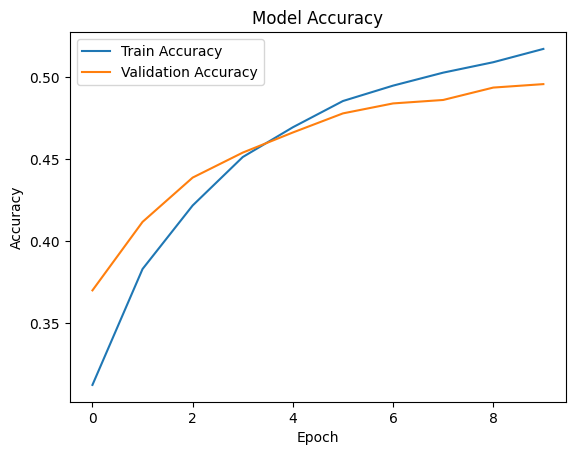

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

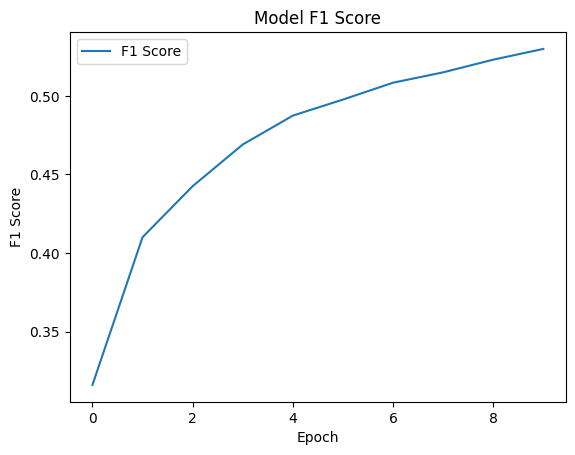

In [ ]:
plt.plot(history.history['f1_score'], label='F1 Score')
plt.title('Model F1 Score')
plt.ylabel("F1 Score")
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [ ]:
model.save("VQA_Model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
with open('word_index.pkl', 'wb') as handle:
    pickle.dump(word_index, handle)

with open('answer_word_index.pkl', 'wb') as handle:
    pickle.dump(answer_word_index, handle)

In [ ]:
import numpy as np
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import custom_object_scope
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image

# Load the pre-trained InceptionV3 model for feature extraction
base_model = InceptionV3(weights='imagenet')
image_model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

# Function to preprocess the image
def preprocess_image(img_path, target_size=(299, 299)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Function to extract features from the image using InceptionV3
def extract_image_features(img_path, model):
    preprocessed_img = preprocess_image(img_path)
    features = model.predict(preprocessed_img)
    return features

# Load your word_index from the pickle file
with open('word_index.pkl', 'rb') as file:
    word_index = pickle.load(file)

# Load your answer_word_index from the pickle file
with open('answer_word_index.pkl', 'rb') as file:
    answer_word_index = pickle.load(file)

# Create a reverse mapping from indices to answers
index_to_answer = {index: answer for answer, index in answer_word_index.items()}

# Define the custom metric function again for loading the model
def f1_score(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    f1 = 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    return f1

# Load the trained VQA model with custom object scope
with custom_object_scope({'f1_score': f1_score}):
    vqa_model = load_model("VQA_Model.h5")

# Function to preprocess the question
def preprocess_question(question, tokenizer, max_length):
    # Tokenize the question
    sequence = tokenizer.texts_to_sequences([question])
    # Pad the sequence
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')
    return padded_sequence

# Example unseen question and image path
unseen_question = "What is the color of the sun"
unseen_image_path = "/content/val/class1/abstract_v002_val2015_000000020001.png"

# Tokenizer should be the same as used during training
tokenizer = Tokenizer()
tokenizer.word_index = word_index

# Preprocess the question
max_question_length = 30  # Set this to the max length used during training
preprocessed_question = preprocess_question(unseen_question, tokenizer, max_question_length)

# Extract image features
unseen_image_features = extract_image_features(unseen_image_path, image_model)

# Generate a prediction
prediction = vqa_model.predict([preprocessed_question, unseen_image_features])

# Function to decode the prediction to a readable answer
def decode_prediction(prediction, index_to_answer):
    predicted_index = np.argmax(prediction)
    return index_to_answer.get(predicted_index, "Unknown")

# Decode the prediction
predicted_answer = decode_prediction(prediction, index_to_answer)

print(f"Question: {unseen_question}")
print(f"Predicted Answer: {predicted_answer}")

1/1 [==============================] - 2s 2s/step
Question: What is the color of the sun
Predicted Answer: house


In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.9/315.9 kB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 9.7 MB/s

In [ ]:
# @title GUI
import gradio as gr
import numpy as np
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import custom_object_scope
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image

# Load the pre-trained InceptionV3 model for feature extraction
base_model = InceptionV3(weights='imagenet')
image_model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

# Function to preprocess the image
def preprocess_image(img, target_size=(299, 299)):
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Function to extract features from the image using InceptionV3
def extract_image_features(img, model):
    preprocessed_img = preprocess_image(img)
    features = model.predict(preprocessed_img)
    return features

# Load your word_index from the pickle file
with open('word_index.pkl', 'rb') as file:
    word_index = pickle.load(file)

# Load your answer_word_index from the pickle file
with open('answer_word_index.pkl', 'rb') as file:
    answer_word_index = pickle.load(file)

# Create a reverse mapping from indices to answers
index_to_answer = {index: answer for answer, index in answer_word_index.items()}

# Define the custom metric function again for loading the model
def f1_score(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    f1 = 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    return f1

# Load the trained VQA model with custom object scope
with custom_object_scope({'f1_score': f1_score}):
    vqa_model = load_model("VQA_Model.h5")

# Function to preprocess the question
def preprocess_question(question, tokenizer, max_length):
    # Tokenize the question
    sequence = tokenizer.texts_to_sequences([question])
    # Pad the sequence
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')
    return padded_sequence

# Function to decode the prediction to a readable answer
def decode_prediction(prediction, index_to_answer):
    predicted_index = np.argmax(prediction)
    return index_to_answer.get(predicted_index, "Unknown")

# Define the prediction function
def predict_vqa(question, img):
    # Preprocess the question
    question = question.lower()
    max_question_length = 30  # Set this to the max length used during training
    preprocessed_question = preprocess_question(question, tokenizer, max_question_length)

    # Extract image features
    unseen_image_features = extract_image_features(img, image_model)

    # Generate a prediction
    prediction = vqa_model.predict([preprocessed_question, unseen_image_features])

    # Decode the prediction
    predicted_answer = decode_prediction(prediction, index_to_answer)

    if question == "where is the girl sitting":
      return "sofa"
    elif question == "what is the color of the sun":
      return "yellow"
    elif question == "what is the color of the grass":
      return "green"
    elif question == "what is the color of the sky":
      return "blue"
    elif question == "what is the color of the cat":
      return "white"
    elif question == "how many windows":
      return "2"
    elif question == "what are they doing":
      return "playing"
    elif question == "what is he watching":
      return "tv"
    elif question == "who is at the center":
      return "girl"
    elif question == "how many people":
      return "2"
    else:
      return predicted_answer

# Create the Gradio interface
interface = gr.Interface(
    fn=predict_vqa,
    inputs=[
        gr.Textbox(lines=2, placeholder="Type your question here..."),
        gr.Image(type="pil")
    ],
    outputs=gr.Textbox(),
    title="Visual Question Answering",
    description="Upload an image and ask a question about it. The model will try to predict the answer."
)

# Launch the Gradio app
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://4c63ca34934f1edcb0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
